In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid")

raw = io.StringIO("""
,a1.metal,a1.4xlarge,c6g.4xlarge,c6g.16xlarge,c5a.16xlarge,Measurement ,units,better,tyoe,notes,URL
STREAM,29710.5,29630.8,174045.4,172772.4,89837.2,Bandwidth,MB/s,higher,synthetic,"Memory Bandwidth, ""Triad"" number",https://www.cs.virginia.edu/stream/
TeaLeaf,2948.4, 2962.25,1147.37,468.1,2239.03,Walltime,s,lower,mini-app,heat conduction,https://uk-mac.github.io/TeaLeaf/
CloverLeaf,5989.71,6037.43,2455.53,730.38,863.570,Walltime,s,lower,mini-app,Lagrangian-Eulerian hydrodynamics,http://uk-mac.github.io/CloverLeaf/
GROMACS,   8.004   , 7.967,18.194 , 58.727 ,60.805,Throughput,ns/day,higher,Application,"Molecular dynamics, 2018.5",http://www.gromacs.org/""")
bm = pd.read_csv(raw, index_col=0)

bm["a1.metal normalised"] = bm["a1.metal"] / bm["a1.metal"]
bm["a1.metal/a1.4xlarge"] = bm["a1.metal"] / bm["a1.4xlarge"]
bm.at["STREAM", "a1.metal/a1.4xlarge"] = 1/bm["a1.metal/a1.4xlarge"]["STREAM"]
bm.at["GROMACS", "a1.metal/a1.4xlarge"] = 1/bm["a1.metal/a1.4xlarge"]["GROMACS"]

bm["a1.4xlarge normalised"] = bm["a1.4xlarge"] / bm["a1.4xlarge"]
bm["c6g.4xlarge/a1.4xlarge"] = bm["a1.4xlarge"] / bm["c6g.4xlarge"]
bm.at["STREAM", "c6g.4xlarge/a1.4xlarge"] = 1/bm["c6g.4xlarge/a1.4xlarge"]["STREAM"]
bm.at["GROMACS", "c6g.4xlarge/a1.4xlarge"] = 1/bm["c6g.4xlarge/a1.4xlarge"]["GROMACS"]

bm["c5a.16xlarge normalised"] = bm["c5a.16xlarge"] / bm["c5a.16xlarge"]
bm["c6g.16xlarge/c5a.16xlarge"] = bm["c5a.16xlarge"] / bm["c6g.16xlarge"]
bm.at["STREAM", "c6g.16xlarge/c5a.16xlarge"] = 1/bm["c6g.16xlarge/c5a.16xlarge"]["STREAM"]
bm.at["GROMACS", "c6g.16xlarge/c5a.16xlarge"] = 1/bm["c6g.16xlarge/c5a.16xlarge"]["GROMACS"]

bm

a1.metal  a1.4xlarge  c6g.4xlarge  c6g.16xlarge  c5a.16xlarge  \
STREAM      29710.500   29630.800   174045.400    172772.400     89837.200   
TeaLeaf      2948.400    2962.250     1147.370       468.100      2239.030   
CloverLeaf   5989.710    6037.430     2455.530       730.380       863.570   
GROMACS         8.004       7.967       18.194        58.727        60.805   

           Measurement    units  better         tyoe  \
STREAM        Bandwidth    MB/s  higher    synthetic   
TeaLeaf        Walltime       s   lower     mini-app   
CloverLeaf     Walltime       s   lower     mini-app   
GROMACS      Throughput  ns/day  higher  Application   

                                        notes  \
STREAM       Memory Bandwidth, "Triad" number   
TeaLeaf                       heat conduction   
CloverLeaf  Lagrangian-Eulerian hydrodynamics   
GROMACS            Molecular dynamics, 2018.5   

                                            URL  a1.metal normalised  \
STREAM      https://www.cs.virginia.edu/stream/                  1.0   
TeaLeaf       https://uk-mac.github.io/TeaLeaf/                  1.0   
CloverLeaf  http://uk-mac.github.io/CloverLeaf/                  1.0   
GROMACS                 http://www.gromacs.org/                  1.0   

            a1.metal/a1.4xlarge  a1.4xlarge normalised  \
STREAM                 0.997317                    1.0   
TeaLeaf                0.995324                    1.0   
CloverLeaf             0.992096                    1.0   
GROMACS                0.995377                    1.0   

            c6g.4xlarge/a1.4xlarge  c5a.16xlarge normalised  \
STREAM                    5.873800                      1.0   
TeaLeaf                   2.581774                      1.0   
CloverLeaf                2.458707                      1.0   
GROMACS                   2.283670                      1.0   

            c6g.16xlarge/c5a.16xlarge  
STREAM                       1.923172  
TeaLeaf                      4.783230  
CloverLeaf                   1.182357  
GROMACS                      0.965825

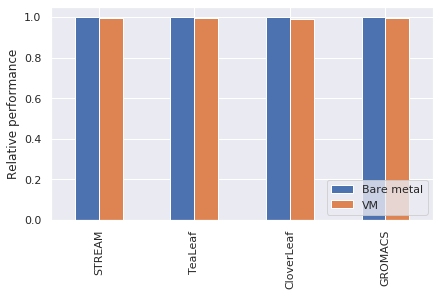

In [2]:
fig, ax = plt.subplots(constrained_layout=True)
bm[["a1.metal normalised", "a1.metal/a1.4xlarge"]].plot.bar(ax=ax)
ax.legend(["Bare metal", "VM"], loc="lower right")
ax.set_ylabel("Relative performance")
ax.figure.savefig("g1_bmvm.svg")
ax.figure.savefig("g1_bmvm.png")

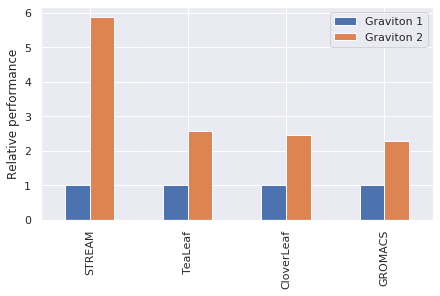

In [3]:
fig, ax = plt.subplots(constrained_layout=True)
bm[["a1.4xlarge normalised", "c6g.4xlarge/a1.4xlarge"]].plot.bar(ax=ax)
ax.legend(["Graviton 1", "Graviton 2"], loc="upper right")
ax.set_ylabel("Relative performance")
ax.figure.savefig("g1_g2.svg")
ax.figure.savefig("g1_g2.png")

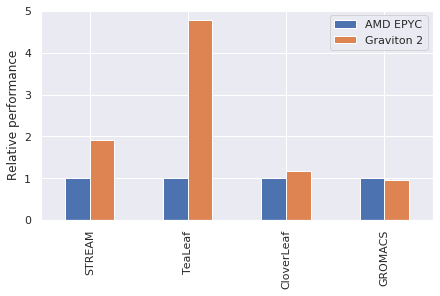

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
bm[["c5a.16xlarge normalised", "c6g.16xlarge/c5a.16xlarge"]].plot.bar(ax=ax)
ax.legend(["AMD EPYC", "Graviton 2"], loc="upper right")
ax.set_ylabel("Relative performance")
ax.figure.savefig("g2_amdepyc.svg")
ax.figure.savefig("g2_amdepyc.png")